# Linear Regression

## Titanic dataset

We will use a [linear model](https://www.tensorflow.org/tutorials/estimator/linear) to predict the survival rate of passangers from the Titanic.


### Line of best fit

If data points are related linearly, we can generate a line of best fit for these points, and use it to predict future values.

This data set has **one feature** and **one label**.

(0.0, 6.0, 0.0, 20.0)

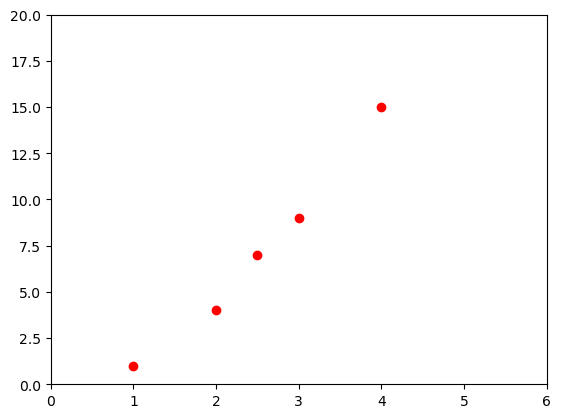

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# These are just lists
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, 'ro')

# Axis limits
plt.axis([0, 6, 0, 20])


## Setting plot axis limits

The function `plt.axis([0, 6, 0, 20])` in Matplotlib's pyplot module is used to set the limits of the axes of a plot.

In this particular case, the function sets the **x-axis** limits to be between 0 and 6, and the **y-axis** limits to be between 0 and 20.

This means that any data plotted in the figure will be scaled to fit within these limits.

The first two values in the argument list, `[0, 6]`, correspond to the limits of the x-axis, while the second two values, `[0, 20]`, correspond to the limits of the y-axis.

This is what it looks like without it:

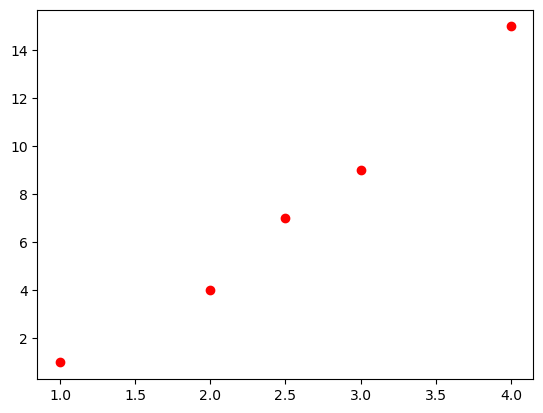

In [2]:
# No axis limits
plt.plot(x, y, 'ro')

**Linear coorespondence:** when the x value increases, so does the y.

Our line will only use 1 input variable, as we are working with 2D.

[Line of best fit best expresses the relationship between the points](https://www.investopedia.com/terms/l/line-of-best-fit.asp)

### Equation of a line in 2D

```
y = mx + b
```

**b** = where the line starts, on the y axis.  "The y-intercept."

**m** = slope; the steepness of a line.

[1:06:00]


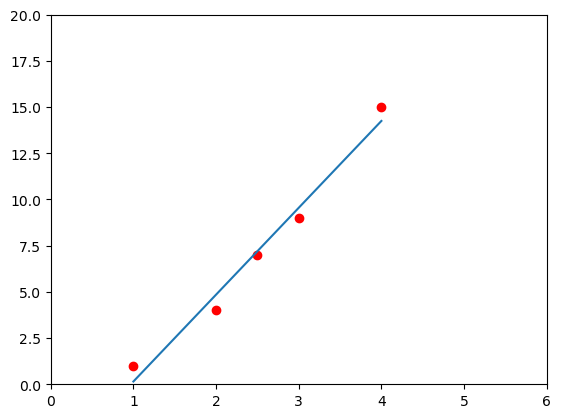


"equation" of best fit: [ 4.7  -4.55]

new function:  
4.7 x - 4.55

unique x: [1.  2.  2.5 3.  4. ]

corresponding y: [ 0.15  4.85  7.2   9.55 14.25] 



In [3]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Calculate the equation of a straight line that best fits the data in x and y.
line_best_fit = np.polyfit(x, y, 1)

# Turn that equation into a function that we can use to calculate the y value for any x value along the line.
my_func = np.poly1d(line_best_fit)

# Make a new list with just the unique values of x
uniq = np.unique(x)

# Calculate the y values for each unique x value, and then plot
plt.plot(uniq, my_func(uniq))

plt.show()

print("\n\"equation\" of best fit:", line_best_fit)  # numpy.ndarray
print("\nnew function:", my_func)  # numpy.poly1d
print("\nunique x:", uniq)  # numpy.ndarray
print("\ncorresponding y:", my_func(uniq), "\n")  # numpy.ndarray

Now we can use this line's equation to predict future values.

We just pass the features of the "data point" we would like to predict => into the equation of the line, and use the output as our prediction.

### Setup and Imports

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

2023-04-22 09:40:56.996636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data

Exploring, cleaning, and selecting appropriate data.

Dataset has tons of information.  Our first step is always to understand the data, and explore it.

In [5]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')  # training data
dfeval  = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')   # testing data


In [6]:
series_group_by = dftrain.groupby('sex').survived

pd.DataFrame(series_group_by.mean())  # bc it's 0 and 1

,survived
sex,
female,0.778802
male,0.180488


In [7]:
# Get our "labels" that we're gonna predict
y_train = dftrain.pop('survived')  # pandas Series
y_eval = dfeval.pop('survived')  # pandas Series

pd.DataFrame(y_train).head()

,survived
0,0
1,1
2,1
3,1
4,0


The ```pd.read_csv()``` method will return to us a new pandas *dataframe*; like a table.

Pop the "survived" column from our dataset and store it in a new variable.  (Survived = yes or no.)

To look at the data we'll use the ```.head()``` method from pandas.

Shows first 5 items in dataframe.

In [8]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


If we want a more statistical analysis of our data, we can use ```.describe()```

In [9]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


### Shape:

In [10]:
dftrain.shape

(627, 9)

So have have 627 entries and 9 features.

### Survival information:

In [11]:
pd.DataFrame(y_train).head()

,survived
0,0
1,1
2,1
3,1
4,0


Each entry is either a 0 or 1.

### Age:

<AxesSubplot:>

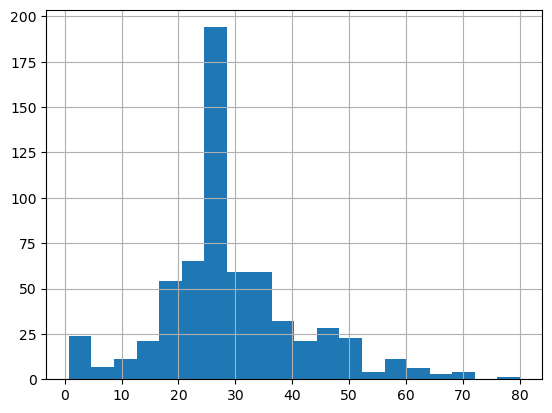

In [12]:
dftrain.age.hist(bins=20)

### Sex:

<AxesSubplot:>

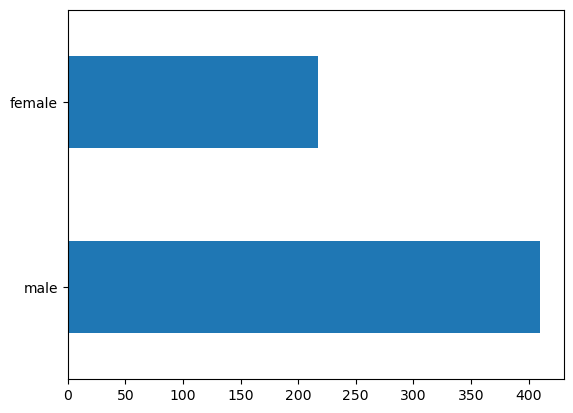

In [13]:
dftrain.sex.value_counts().plot(kind='barh')

### Class

<AxesSubplot:>

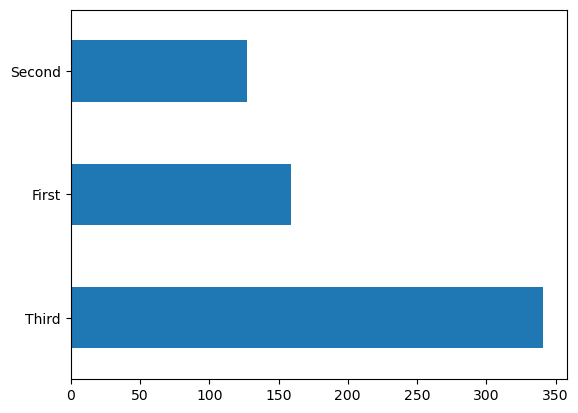

In [14]:
dftrain['class'].value_counts().plot(kind='barh')

### Sex vs Survival

Text(0.5, 0, '% survive')

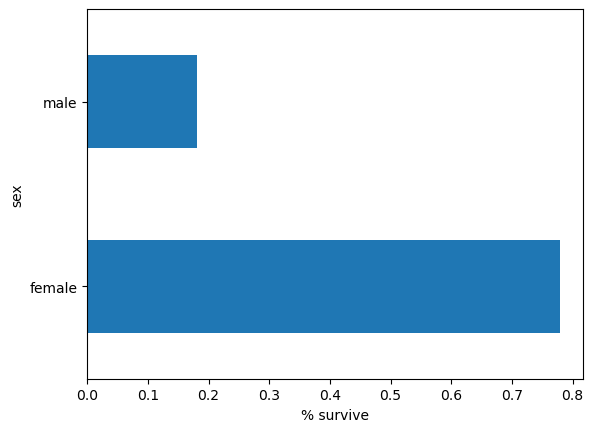

In [15]:
# Concat. We took it apart, now we're putting it back together again.
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

### So look:

- Most passengers are in their 20's or 30's 
- Most passengers are male
- Most passengers are in "Third" class
- Females have a much higher chance of survival

### Training vs Testing Data

When we train models, we need two sets of data: **training and testing**.

The **training** data is what we feed to the model so that it can learn.

It is usually a much larger size than the testing data.

The **testing** data is what we use to evaulate the model, and see how well it is performing.

Our model should be able to make predictions on NEW data, that we have never seen before.

## Feature Columns

We have two kinds of information: **Categorical and Numeric**

Our **categorical data** is like "male" and "female".

Before we continue and create/train a model, we must convert our categorical data into numeric data.

Encode each category with an integer (ex. male = 1, female = 2)

In [16]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()  # Unique features
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    print(feature_name, "\t", vocabulary)

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

pd.DataFrame(feature_columns)

sex 	 ['male' 'female']
n_siblings_spouses 	 [1 0 3 4 2 5 8]
parch 	 [0 1 2 5 3 4]
class 	 ['Third' 'First' 'Second']
deck 	 ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
embark_town 	 ['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
alone 	 ['n' 'y']


,key,vocabulary_list,dtype,default_value,num_oov_buckets
0,sex,"(male, female)",<dtype: 'string'>,-1,0.0
1,n_siblings_spouses,"(1, 0, 3, 4, 2, 5, 8)",<dtype: 'int64'>,-1,0.0
2,parch,"(0, 1, 2, 5, 3, 4)",<dtype: 'int64'>,-1,0.0
3,class,"(Third, First, Second)",<dtype: 'string'>,-1,0.0
4,deck,"(unknown, C, G, A, B, D, F, E)",<dtype: 'string'>,-1,0.0
5,embark_town,"(Southampton, Cherbourg, Queenstown, unknown)",<dtype: 'string'>,-1,0.0
6,alone,"(n, y)",<dtype: 'string'>,-1,0.0
7,age,"(1,)",None,<dtype: 'float32'>,NaN
8,fare,"(1,)",None,<dtype: 'float32'>,NaN


Basically, we're **creating a list of features** that are used in our dataset. 

The lines of code inside ```append()``` create an object that our model can use to map string values like "male" and "female" to integers.

[*Here is some relevant documentation*](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable)

## FYI: Deprecated

[feature column - categorical column with vocabulary list](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list)

Use **Keras preprocessing layers** instead, either directly **or** via the `tf.keras.utils.FeatureSpace` utility.

Each of `tf.feature_column.*` has a **functional equivalent** in `tf.keras.layers` for feature preprocessing when training a Keras model.

## How the model is trained

How is input data fed to our model?

Data is going to be streamed into it in small batches of 32.

We will feed these batches to our model multiple times according to the number of **epochs**. 

The number of epochs we define is the amount of times our model will see the entire dataset.

We use multiple epochs in hope that after seeing the same data multiple times, the model will better determine how to estimate it.

**Example:** If we have 10 epochs, our model will see the same dataset 10 times. 

Since we need to feed our data in batches and multiple times, we need to create something called an **input function**.

The input function simply defines how our dataset will be converted into batches at each epoch.


### Input Function

The model we use, requires that the data we pass it, comes in as a ```tf.data.Dataset``` object.

This means we must create an *input function* that can convert our current pandas dataframe into that object. 

[Straight Outta TensorFlow](https://www.tensorflow.org/tutorials/estimator/linear)


In [17]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    # Inner function, this will be returned
    def input_function():
        # Create tf.data.Dataset object with data and its label
        ds = tf.data.Dataset.from_tensor_slices(
            (dict(data_df), label_df)
        )

        # Randomize order of data
        if shuffle:
            ds = ds.shuffle(1000)

        # Split dataset into batches of 32 and repeat process for number of epochs
        ds = ds.batch(batch_size).repeat(num_epochs)
        
        # ds is of type RepeatDataset

        return ds  # Return a batch of the dataset

    return input_function  # Return a function object for use


# Call the input_function that was returned to us
# to get a dataset object we can feed to the model
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

print("Input functions created successfully.")

Input functions created successfully.


## Creating the Model

We'll use a **linear estimator** for the linear regression algorithm. 


In [18]:
# We create a linear estimator by passing the feature columns we created earlier
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

clear_output()

type(linear_est)

tensorflow_estimator.python.estimator.canned.linear.LinearClassifierV2

## Training the Model

All we gotta do is pass the input functions that we created earlier.

In [19]:
# Train - with linear classifier
linear_est.train(train_input_fn)

# Get model metrics/stats by testing on testing data
result = linear_est.evaluate(eval_input_fn)

# clear console output
clear_output()

print("\ndict", result)

# a dict of stats about our model
print("\naccuracy:", result['accuracy'])



dict {'accuracy': 0.7462121, 'accuracy_baseline': 0.625, 'auc': 0.8235997, 'auc_precision_recall': 0.78500473, 'average_loss': 0.527766, 'label/mean': 0.375, 'loss': 0.5251183, 'precision': 0.6333333, 'prediction/mean': 0.4887611, 'recall': 0.7676768, 'global_step': 200}

accuracy: 0.7462121


Now we have a model with a `74%` accuracy. (For our first try.  If you run it over and over again, you'll get better and better values.)

Gweat!

## How do you use the model to make predictions?

Use the ```.predict()``` method to get survival probabilities from the model.

This method will return a list of `dict`s that store a prediction for each of the entries in our testing data set.

Below we've used some **pandas** magic to plot a nice graph of the predictions.

As you can see, the survival rate is not very high.

## Predicted Probabilities:


In [20]:
pred_dicts = list(linear_est.predict(eval_input_fn))

probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

clear_output()

pd.DataFrame(probs).head()  # 264 rows

,0
0,0.143722
1,0.668831
2,0.885800
3,0.837655
4,0.435254


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

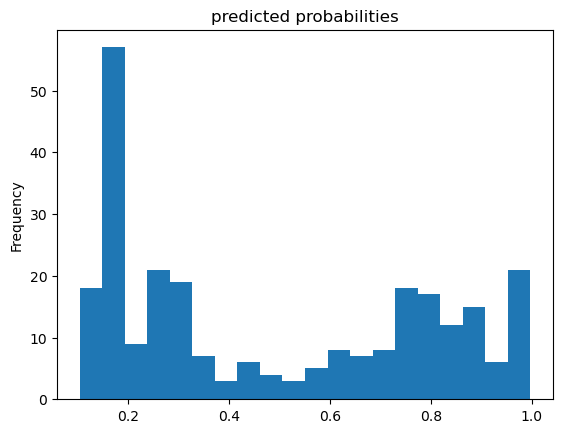

In [21]:
# Frequency [vs] Probability of Survival
probs.plot(kind='hist', bins=20, title='predicted probabilities')

# Classification

Regression was used to predict a **numeric** value.

Classification is used to seperate data points into classes of different **labels**.

We'll use a TensorFlow estimator to classify **flowers**.

[Premade Estimators](https://www.tensorflow.org/tutorials/estimator/premade)


### Imports and Setup

In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd

### Dataset

This dataset seperates flowers into 3 classes of species:

- Setosa
- Versicolor
- Virginica

Information about each flower:

- sepal length
- sepal width
- petal length
- petal width

In [23]:
# Lets define some constants to help us later on

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

SPECIES = ['Setosa', 'Versicolor', 'Virginica']


### Keras

In [24]:
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")

test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)

test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Now, pop the **species** column off, and use that as our label.

In [25]:
train_y = train.pop('Species')
test_y = test.pop('Species')

train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [26]:
train.shape  # we have 120 entries with 4 features

(120, 4)

## Input Function

We gotta make another input function.

This one's a little easier.

In [27]:
def input_fn(features, labels, training=True, batch_size=256):

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat, if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


## Feature Columns

Don't forget about the feature columns...

In [28]:
# Feature columns - basically, your Excel table header
my_feature_columns = []

for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

pd.DataFrame(my_feature_columns)

,key,shape,default_value,dtype,normalizer_fn
0,SepalLength,"(1,)",None,<dtype: 'float32'>,None
1,SepalWidth,"(1,)",None,<dtype: 'float32'>,None
2,PetalLength,"(1,)",None,<dtype: 'float32'>,None
3,PetalWidth,"(1,)",None,<dtype: 'float32'>,None


### Building the Model

Now we're ready to choose a model.

Different estimators / models to pick from:

- ```DNNClassifier``` (Deep Neural Network)
- ```LinearClassifier```

DNN seems to be the best choice.

This is because we may not be able to find a linear coorespondence in our data. 

## Build a model

In [29]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.

classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes, respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

clear_output()

## Hecc

We created a deep neural network that has two hidden layers.

These layers have 30 and 10 *neurons*, respectively.

This is what "they" use, so we'll just stick with it.

**Note:** The number of hidden neurons is an arbitrary number, and many experiments and tests are usually done to determine the best choice for these values.

Try playing around with the number of hidden neurons and see if your results change.

## Train the model

In [30]:
"""
Train the classifier
We include a lambda to avoid creating an inner function, like before.
"""
classifier.train(input_fn=lambda: input_fn(train, train_y, training=True), steps=5000)

# So we get a lot of output...
# loss = 0.96586823, step = 500 (0.108 sec) (As in, step 0, 100, 200, 300...)

# And finally:
# Loss for final step: 0.8344785

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2023-04-22 09:41:05.635870: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT64
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}

	while inferring type of node 'dnn/zero_fraction/cond/output/_18'


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/47/6nl3w5n91ql2msklj729p6cr0000gn/T/tmp3p7fct82/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.3433871, step = 0
INFO:tensorflow:global_step/sec: 680.12
INFO:tensorflow:loss = 1.0490801, step = 100 (0.148 sec)
INFO:tensorflow:global_step/sec: 914.906
INFO:tensorflow:loss = 0.9603011, step = 200 (0.109 sec)
INFO:tensorflow:global_step/sec: 938.762
INFO:tensorflow:loss = 0.91325307, step = 300 (0.106 sec)
INFO:tensorflow:global_step/sec: 946.569
INFO:tensorflow:loss = 0.87296474, step = 400 (0.106 sec)
INFO:tensorflow:global_step/sec: 935.487
INFO:tensorflow:loss = 0.8376091, step = 500 (0.107 sec)
INFO:tensorflow:global_step/sec: 944.35
INFO:tensorflow:loss = 0.80344385, step = 600 (0.106 sec)
INFO:tensorflow:global_step/sec: 936.214
INFO:tensorflow:loss = 0.778782, step = 700 (0.107 sec)
INF

### Steps

The **steps** argument tells the classifier to run for `5000` steps.

Try modifiying this and seeing if your results change. (More is not always better.)

### Evaluation

Let's see how the trained model does!

In [31]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

clear_output()

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))



Test set accuracy: 0.533



### No steps

Notice this time we didn't specify the number of steps.

Because during evaluation, the model will only look at the testing data 1 time.

## Predictions

Now that we have a trained model, we'll use it to make predictions.

This little script allows you to type the features of a flower, and see a prediction for its class.

In [32]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

# We're making a dictionary
# print("Please type numeric values as prompted.")
# for feature in features:
#     valid = True

#     while valid:
#         val = input(feature + ": ")

#         if not val.isdigit():
#             valid = False

#     predict[feature] = [float(val)]

# Funk dat.
predict = {'SepalLength': [0.5], 'SepalWidth': [0.4], 'PetalLength': [0.5], 'PetalWidth': [0.3]}

predictions = classifier.predict(input_fn=lambda: input_fn(predict))

for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

# Please type numeric values as prompted.
# SepalLength: 23
# SepalLength: 12
# SepalLength: 12
# SepalLength: 3
# SepalLength: 4
# SepalLength: 2
# SepalLength: 0.5
# SepalWidth: 2
# SepalWidth: 0.4
# PetalLength: 0.5
# PetalWidth: 0.3

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/47/6nl3w5n91ql2msklj729p6cr0000gn/T/tmp3p7fct82/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (41.0%)


In [33]:
# Here is some example input and expected classes you can try above

expected = ['Setosa', 'Versicolor', 'Virginica']

predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

# Clustering

So we got:

* Regression
* Classification
* And now: Clustering data

Clustering is a technique that involves the grouping of data points.

Theoretically, data points that are in the same group should have similar properties and/or features.

Data points in different groups should have highly dissimilar properties and/or features.

(https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

*Unfortunalty there are issues with the current version of TensorFlow and the implementation for **KMeans**.*

This means we cannot use KMeans without writing the algorithm from scratch.

We're not quite "there" yet, so we'll just explain the basics:

## Basic Algorithm for K-Means

- Step 1: Randomly pick K points to place K centroids
- Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

*Please refer to the video for an explanation of KMeans clustering.*

## Hidden Markov Models

[Definition of Hidden Markov Model](http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

A hidden markov model works with probabilities to predict future events or states.

Let's create a hidden markov model that can predict the weather.

[Tutorial](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel)

## Data

Previously, we worked with large datasets of 100's of different entries.

For a markov model, we are only interested in probability distributions that have to do with **states**. 

We can find these probabilities from large datasets, or may already have these values.

## Components of a markov model:

**States:** In each markov model, we have a finite set of states. Like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". 

These states are "hidden" within the model, which means we do not direcly observe them.

**Observations:** Each state has a particular outcome or observation associated with it, based on a probability distribution.

Example: *On a hot day, Bear has a 80% chance of being happy and a 20% chance of being sad.*  (Seems kinda dumb, but whatever, let's roll with it.)

**Transitions:** Each state will have a probability defining the **likelihood of transitioning** to a different state.

Example: *a cold day has a 30% chance of being followed by a hot day, and a 70% chance of being followed by another cold day.*

(Wuzzle means to mix.  Sculch is junk...)

To create a hidden markov model we need:

- States
- Observation Distribution
- Transition Distribution

Let's assume we already have this information available as we attempt to predict the weather on a given day.

### Imports and Setup

Due to a version mismatch with` tensorflow v2` and `tensorflow_probability`, we need to install the most recent version of `tensorflow_probability`:

In [34]:
# pip install -U tensorflow_probability
# Successfully installed cloudpickle-2.2.1 dm-tree-0.1.8 tensorflow_probability-0.19.0

import tensorflow_probability as tfp
import tensorflow as tf

### Weather Model

[Straight Outta TensorFlow](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel)

We will model a simple weather system, and try to predict the temperature on each day, given the following info:

1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

**standard deviation** can be put simply as: the range of expected values.

In this example, on a hot day, the average temperature is 15, and ranges from 5 to 25.

### Model it in TensorFlow:

In [35]:
tfd = tfp.distributions  # making a shortcut for later on

# Refer to point 2 above
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])

# Refer to points 3 and 4 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5], [0.2, 0.8]])

# Refer to point 5 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])

# the loc argument represents the mean
# the scale is the standard deviation


We've now created distribution variables to model our system.

Now to create the hidden markov model:

In [36]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for.

In this case we've chosen 7, an entire week.

To get the **expected temperatures** on each day we can do:

In [37]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

[11.999999 11.1      10.830001 10.748999 10.724698 10.71741  10.715222]


## Sources

1. Chen, James. “Line Of Best Fit.” Investopedia, Investopedia, 29 Jan. 2020, www.investopedia.com/terms/l/line-of-best-fit.asp.
2. “Tf.feature_column.categorical_column_with_vocabulary_list.” TensorFlow, www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable.
3. “Build a Linear Model with Estimators &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/estimator/linear.
4. Staff, EasyBib. “The Free Automatic Bibliography Composer.” EasyBib, Chegg, 1 Jan. 2020, www.easybib.com/project/style/mla8?id=1582473656_5e52a1b8c84d52.80301186.
5. Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 14 Sept. 2019, https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
6. Definition of Hidden Markov Model, http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html.
7. “Tfp.distributions.HiddenMarkovModel &nbsp;: &nbsp; TensorFlow Probability.” TensorFlow, www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel.